# Assignment 7: IMAGE CLASSIFICATION

Ana María Garzón


In [ ]:
!pip install torch
!pip install torchvision
!pip install efficientnet_pytorch
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for efficientnet_pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=ef0d5dffe32f9d37e72da8389338eaa45e2908e89ee22ea09674dc5de1348ed9
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
Successfully built efficientnet_pytorch
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importar librerías

In [ ]:
import cv2
import matplotlib.pyplot as plt
import json
import torch
import numpy as np
from torchvision import transforms
from efficientnet_pytorch import EfficientNet
from PIL import Image

Cargar imagenes

In [ ]:
img1 = cv2.imread('image_1.jpg')
img2 = cv2.imread('image_2.jpg')
img3 = cv2.imread('image_3.jpg')
img4 = cv2.imread('image_4.jpg')
img5 = cv2.imread('image_5.jpeg')
img6 = cv2.imread('image_6.jpeg')

Convertir imagenes a RGB

In [ ]:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)


**Clasificación de imágenes**

• Realice la clasificación de las imágenes 1, 2, 3, y 4 mediante la red neuronal convolucional (CNN) DenseNet (densenet201). Cargue el modelo (frozen model) utilizando OpenCV y el framework Caffe. Visualice en RGB la imagen, la categoría y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de ImageNet


Cargar base de datos de nombres de clases (ImageNet)

In [ ]:
with open('classification_classes_ILSVRC2012.txt','r') as f:
  class_names = f.read().split('\n')
class_names = [name.split(',')[0] for name in class_names]


Cargar modelo DenseNet (frozen model) usando framework Caffe

In [ ]:
DenseNet = cv2.dnn.readNet(model='DenseNet_201.caffemodel', config='DenseNet_201.prototxt.txt',framework='Caffe')

Establecer ROI de entrada (blob) en RGB

In [ ]:
blob1 = cv2.dnn.blobFromImage(image=img1, scalefactor=0.01, size=(224,224))
blob2 = cv2.dnn.blobFromImage(image=img2, scalefactor=0.01, size=(224,224))
blob3 = cv2.dnn.blobFromImage(image=img3, scalefactor=0.01, size=(224,224))
blob4 = cv2.dnn.blobFromImage(image=img4, scalefactor=0.01, size=(224,224))

Evaluar ROI en el modelo DenseNet

In [ ]:
DenseNet.setInput(blob1)
outputs1 = DenseNet.forward()
final_outputs1 = outputs1[0].reshape(1000,1)

In [ ]:
DenseNet.setInput(blob2)
outputs2 = DenseNet.forward()
final_outputs2 = outputs2[0].reshape(1000,1)

In [ ]:
DenseNet.setInput(blob3)
outputs3 = DenseNet.forward()
final_outputs3 = outputs3[0].reshape(1000,1)

In [ ]:
DenseNet.setInput(blob4)
outputs4 = DenseNet.forward()
final_outputs4 = outputs4[0].reshape(1000,1)

Obtener etiqueta de clase

In [ ]:
probs1 = np.exp(final_outputs1) / np.sum(np.exp(final_outputs1))
probs2 = np.exp(final_outputs2) / np.sum(np.exp(final_outputs2))
probs3 = np.exp(final_outputs3) / np.sum(np.exp(final_outputs3))
probs4 = np.exp(final_outputs4) / np.sum(np.exp(final_outputs4))

final_prob1 = np.max(probs1)*100
final_prob2 = np.max(probs2)*100
final_prob3 = np.max(probs3)*100
final_prob4 = np.max(probs4)*100

Obtener nombre de la etiqueta de clase

In [ ]:
label_id1 = np.argmax(final_outputs1)
label_id2 = np.argmax(final_outputs2)
label_id3 = np.argmax(final_outputs3)
label_id4 = np.argmax(final_outputs4)

out_name1 = class_names[label_id1]
out_text1 = f"{out_name1}, {final_prob1:3f}"

out_name2 = class_names[label_id2]
out_text2 = f"{out_name2}, {final_prob2:3f}"

out_name3 = class_names[label_id3]
out_text3 = f"{out_name3}, {final_prob3:3f}"

out_name4 = class_names[label_id4]
out_text4 = f"{out_name4}, {final_prob4:3f}"

Agregar texto en la imagen: nombre de clase y puntuación máxima

In [ ]:
cv2.putText(img1_rgb, out_text1, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img2_rgb, out_text2, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img3_rgb, out_text3, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img4_rgb, out_text4, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)

array([[[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [49,  7,  9],
        [52,  7, 10],
        [52,  7, 10]],

       [[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [48,  6,  8],
        [49,  7,  9],
        [52,  7, 10]],

       [[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [48,  6,  8],
        [49,  7,  9],
        [50,  8, 10]],

       ...,

       [[92, 31, 39],
        [92, 31, 39],
        [96, 35, 43],
        ...,
        [42,  3,  6],
        [43,  4,  5],
        [43,  4,  5]],

       [[94, 31, 40],
        [92, 29, 38],
        [95, 32, 41],
        ...,
        [40,  4,  6],
        [42,  3,  4],
        [43,  4,  5]],

       [[96, 33, 42],
        [91, 28, 37],
        [91, 28, 37],
        ...,
        [39,  3,  5],
        [42,  3,  4],
        [43,  4,  5]]], dtype=uint8)

Mostrar imagenes

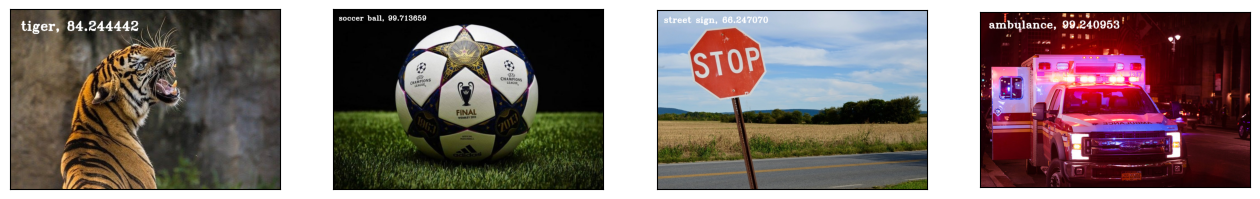

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])

plt.show()

• Realice la clasificación de las imágenes 1, 2, 3, y 4 mediante la red neuronal convolucional
(CNN) EfficientNet en su versión sencilla (efficientnet-b0). Cargue el modelo utilizando el
framework PyTorch. Visualice en RGB la imagen, la categoría y la puntuación máxima
asignadas por la red con ayuda de la base de datos de nombres de clases de EfficientNet

Redefinir imagenes en RGB

In [ ]:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

Cargar modelo EfficientNetV2 en versión sencilla usando framework PyTorch

In [ ]:
EfficientNet = EfficientNet.from_pretrained('efficientnet-b0')

Loaded pretrained weights for efficientnet-b0


Establecer ROI de entrada (blob) en BGR

In [ ]:
transform = transforms.Compose([ transforms.Resize(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img1_PIL = Image.fromarray(img1_rgb)
img2_PIL = Image.fromarray(img2_rgb)
img3_PIL = Image.fromarray(img3_rgb)
img4_PIL = Image.fromarray(img4_rgb)

blob1 = transform(img1_PIL).unsqueeze(0)
blob2 = transform(img2_PIL).unsqueeze(0)
blob3 = transform(img3_PIL).unsqueeze(0)
blob4 = transform(img4_PIL).unsqueeze(0)

Evaluar ROI en el modelo EfficientNet

In [ ]:
EfficientNet.eval()
with torch.no_grad():
  outputs1 = EfficientNet(blob1)
  outputs2 = EfficientNet(blob2)
  outputs3 = EfficientNet(blob3)
  outputs4 = EfficientNet(blob4)

Obtener nombre de la etiqueta de clase

In [ ]:
label_id1 = torch .topk(outputs1, k=1).indices.squeeze(0).tolist()[0]
out_name1 = class_names[label_id1]

label_id2 = torch .topk(outputs2, k=1).indices.squeeze(0).tolist()[0]
out_name2 = class_names[label_id2]

label_id3 = torch .topk(outputs3, k=1).indices.squeeze(0).tolist()[0]
out_name3 = class_names[label_id3]

label_id4 = torch .topk(outputs4, k=1).indices.squeeze(0).tolist()[0]
out_name4 = class_names[label_id4]

Obtener etiqueta de clase

In [ ]:
probs1 = torch.softmax(outputs1, dim=1)[0, label_id1].item()
final_prob1 = probs1*100

probs2 = torch.softmax(outputs2, dim=1)[0, label_id2].item()
final_prob2 = probs2*100

probs3 = torch.softmax(outputs3, dim=1)[0, label_id3].item()
final_prob3 = probs3*100

probs4 = torch.softmax(outputs4, dim=1)[0, label_id4].item()
final_prob4 = probs4*100

Visualizar nombre de clase y puntuación máxima

In [ ]:
out_name1 = class_names[label_id1]
out_text1 = f"{out_name1}, {final_prob1:3f}"

out_name2 = class_names[label_id2]
out_text2 = f"{out_name2}, {final_prob2:3f}"

out_name3 = class_names[label_id3]
out_text3 = f"{out_name3}, {final_prob3:3f}"

out_name4 = class_names[label_id4]
out_text4 = f"{out_name4}, {final_prob4:3f}"

cv2.putText(img1_rgb, out_text1, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img2_rgb, out_text2, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img3_rgb, out_text3, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img4_rgb, out_text4, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)

array([[[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [49,  7,  9],
        [52,  7, 10],
        [52,  7, 10]],

       [[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [48,  6,  8],
        [49,  7,  9],
        [52,  7, 10]],

       [[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [48,  6,  8],
        [49,  7,  9],
        [50,  8, 10]],

       ...,

       [[92, 31, 39],
        [92, 31, 39],
        [96, 35, 43],
        ...,
        [42,  3,  6],
        [43,  4,  5],
        [43,  4,  5]],

       [[94, 31, 40],
        [92, 29, 38],
        [95, 32, 41],
        ...,
        [40,  4,  6],
        [42,  3,  4],
        [43,  4,  5]],

       [[96, 33, 42],
        [91, 28, 37],
        [91, 28, 37],
        ...,
        [39,  3,  5],
        [42,  3,  4],
        [43,  4,  5]]], dtype=uint8)

Mostrar imagen

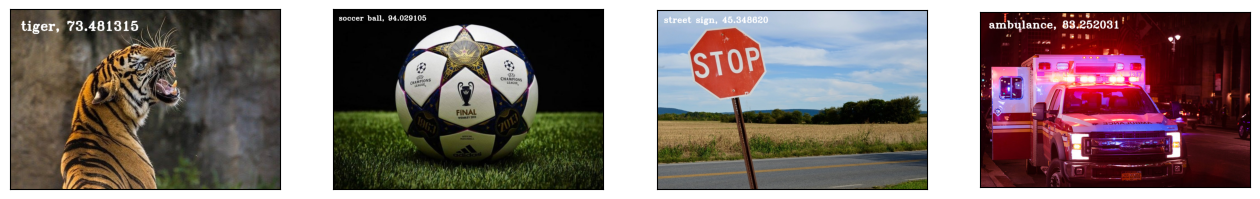

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])

plt.show()

 • Realice la clasificación de las imágenes 1, 2, 3, y 4 mediante la red neuronal convolucional (CNN) EfficientNet en su versión robusta (efficientnet-b7). Cargue el modelo utilizando el framework PyTorch. Visualice en RGB la imagen, la categoría y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de EfficientNet.


Redefinir imagenes en RGB

In [ ]:
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

Cargar modelo EfficientNetV2 en versión robusta usando framework PyTorch


In [ ]:
EfficientNet = EfficientNet.from_pretrained('efficientnet-b7')

Downloading: "https://github.com/lukemelas/EfficientNet-PyTorch/releases/download/1.0/efficientnet-b7-dcc49843.pth" to /root/.cache/torch/hub/checkpoints/efficientnet-b7-dcc49843.pth
100%|██████████| 254M/254M [00:03<00:00, 68.7MB/s]


Loaded pretrained weights for efficientnet-b7


Establecer ROI de entrada (blob) en BGR

In [ ]:
transform = transforms.Compose([ transforms.Resize(224),
                                transforms.ToTensor(),
                                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),])
img1_PIL = Image.fromarray(img1_rgb)
img2_PIL = Image.fromarray(img2_rgb)
img3_PIL = Image.fromarray(img3_rgb)
img4_PIL = Image.fromarray(img4_rgb)

blob1 = transform(img1_PIL).unsqueeze(0)
blob2 = transform(img2_PIL).unsqueeze(0)
blob3 = transform(img3_PIL).unsqueeze(0)
blob4 = transform(img4_PIL).unsqueeze(0)

Evaluar ROI en el modelo EfficientNet

In [ ]:
EfficientNet.eval()
with torch.no_grad():
  outputs1 = EfficientNet(blob1)
  outputs2 = EfficientNet(blob2)
  outputs3 = EfficientNet(blob3)
  outputs4 = EfficientNet(blob4)

Obtener nombre de la etiqueta de clase

In [ ]:
label_id1 = torch .topk(outputs1, k=1).indices.squeeze(0).tolist()[0]
out_name1 = class_names[label_id1]

label_id2 = torch .topk(outputs2, k=1).indices.squeeze(0).tolist()[0]
out_name2 = class_names[label_id2]

label_id3 = torch .topk(outputs3, k=1).indices.squeeze(0).tolist()[0]
out_name3 = class_names[label_id3]

label_id4 = torch .topk(outputs4, k=1).indices.squeeze(0).tolist()[0]
out_name4 = class_names[label_id4]

Obtener etiqueta de clase

In [ ]:
probs1 = torch.softmax(outputs1, dim=1)[0, label_id1].item()
final_prob1 = probs1*100

probs2 = torch.softmax(outputs2, dim=1)[0, label_id2].item()
final_prob2 = probs2*100

probs3 = torch.softmax(outputs3, dim=1)[0, label_id3].item()
final_prob3 = probs3*100

probs4 = torch.softmax(outputs4, dim=1)[0, label_id4].item()
final_prob4 = probs4*100

Visualizar nombre de clase y puntuación máxima

In [ ]:
out_name1 = class_names[label_id1]
out_text1 = f"{out_name1}, {final_prob1:3f}"

out_name2 = class_names[label_id2]
out_text2 = f"{out_name2}, {final_prob2:3f}"

out_name3 = class_names[label_id3]
out_text3 = f"{out_name3}, {final_prob3:3f}"

out_name4 = class_names[label_id4]
out_text4 = f"{out_name4}, {final_prob4:3f}"

cv2.putText(img1_rgb, out_text1, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img2_rgb, out_text2, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img3_rgb, out_text3, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)
cv2.putText(img4_rgb, out_text4, (25,50), cv2.FONT_HERSHEY_TRIPLEX, 1, (255,255,255), 2)

array([[[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [49,  7,  9],
        [52,  7, 10],
        [52,  7, 10]],

       [[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [48,  6,  8],
        [49,  7,  9],
        [52,  7, 10]],

       [[56,  0,  3],
        [56,  0,  3],
        [55,  0,  3],
        ...,
        [48,  6,  8],
        [49,  7,  9],
        [50,  8, 10]],

       ...,

       [[92, 31, 39],
        [92, 31, 39],
        [96, 35, 43],
        ...,
        [42,  3,  6],
        [43,  4,  5],
        [43,  4,  5]],

       [[94, 31, 40],
        [92, 29, 38],
        [95, 32, 41],
        ...,
        [40,  4,  6],
        [42,  3,  4],
        [43,  4,  5]],

       [[96, 33, 42],
        [91, 28, 37],
        [91, 28, 37],
        ...,
        [39,  3,  5],
        [42,  3,  4],
        [43,  4,  5]]], dtype=uint8)

Mostrar imagen

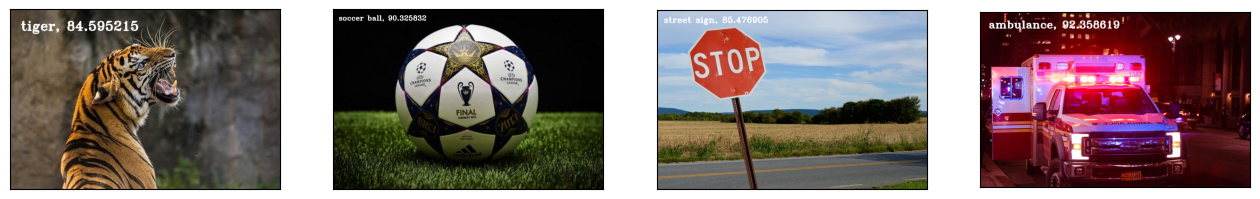

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img1_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(img2_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])

plt.show()

• Realice para las imágenes 1, 2, 3, y 4 la comparación de las puntuaciones máximas asignadas por cada una de las 3 redes de clasificación mencionadas anteriormente.

**Resultados: **
*   Puntuaciones imagen tigre
  * DenseNet: 84.24
  * EfficientNet simple: 73.48
  * EfficientNet robusta: 84.59
*   Puntuaciones imagen balón
  * DenseNet: 99.71
  * EfficientNet simple: 94.03
  * EfficientNet robusta: 90.32
*   Puntaciones imagen signo de pare
  * DenseNet: 66.24
  * EfficientNet simple: 45.35
  * EfficientNet robusta: 85.47
*   Puntuaciones imagen ambulancia
  * DenseNet: 99.24
  * EfficientNet simple: 83.25
  * EfficientNet robusta: 92.36

Los tres métodos clasifican las imagenes correctamente. DenseNet es el que tiene mayor puntaje para la imagen de la ambulancia y el balón con una diferencia de más de 5 puntos porcentuales con respecto a los demás métodos. Estás imagenes se caracterizan porque el objeto a clasificar ocupa una gran cantidad de supenficie de la imagen.

Para las imagenes del signo de pare y el tigre, el método con mayor puntaje fue el de la EfficientNet Robusta. Cabe destacar que la red de EfficientNet simple tuvo mayor puntaje que la robusta para el caso del balón.






# Reconocimiento de objetos

• Realice el reconocimiento de objetos de las imágenes 3, 4, 5, y 6 mediante la red neuronal convolucional (CNN) MobileNet-SSD. Cargue el modelo (frozen model) utilizando OpenCV y el framework TensorFlow. Visualice en RGB la imagen, el cuadro delimitador, la categoría, y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de COCO.



Redefinir imagenes en RGB

In [ ]:
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

Cargar base de datos de nombres de clases (COCO)

In [ ]:
with open('object_detection_classes_coco.txt','r') as f:
  class_names = f.read().split('\n')
class_names = [name.split(',')[0] for name in class_names]


Cargar modelo MobileNet-SSD (frozen model) usando framework TensorFlow

In [ ]:
MobileNet_SSD = cv2.dnn.readNet(model='MobileNet_SSD.pb', config='ssd_mobilenet_coco.pbtxt.txt', framework='TensorFlow')

Establecer ROI de entrada (blob) en BGR

In [ ]:
blob3 = cv2.dnn.blobFromImage(image=img3_rgb, size=(300,300))
blob4 = cv2.dnn.blobFromImage(image=img4_rgb, size=(300,300))
blob5 = cv2.dnn.blobFromImage(image=img5_rgb, size=(300,300))
blob6 = cv2.dnn.blobFromImage(image=img6_rgb, size=(300,300))

Evaluar ROI en el modelo MobileNet

In [ ]:
MobileNet_SSD.setInput(blob3)
output3 = MobileNet_SSD.forward()

MobileNet_SSD.setInput(blob4)
output4 = MobileNet_SSD.forward()

MobileNet_SSD.setInput(blob5)
output5 = MobileNet_SSD.forward()

MobileNet_SSD.setInput(blob6)
output6 = MobileNet_SSD.forward()

Obtener nombres de las etiquetas de clases y obtener
etiquetas de clases

In [ ]:
def mobilenet_function(output,img_rgb):
  [M,N,_] = img_rgb.shape
  colors = np.random.uniform(0, 255, size=(len(class_names),3))
  for detection in output[0,0,:,:]:
    confidence = detection[2]
    if confidence > 0.4:
      final_prob = np.round(confidence,2)
      class_id = detection[1]
      class_name = class_names[int(class_id)-1]
      color = colors[int(class_id)]
      box_x = detection[3] * N
      box_y = detection[4] * M
      box_w = detection[5] * N
      box_h = detection[6] * M
      cv2.rectangle(img_rgb,
                    (int(box_x), int(box_y)),
                    (int(box_w), int(box_h)),
                    color, thickness=2)
      out_text = f"{class_name}{final_prob:.2f}"
      cv2.putText(img_rgb, out_text,
                  (int(box_x), int(box_y -5)), cv2.FONT_HERSHEY_TRIPLEX,
                  1, color, 2)

In [ ]:
mobilenet_function(output3,img3_rgb)
mobilenet_function(output4,img4_rgb)
mobilenet_function(output5,img5_rgb)
mobilenet_function(output6,img6_rgb)

Mostrar imagen

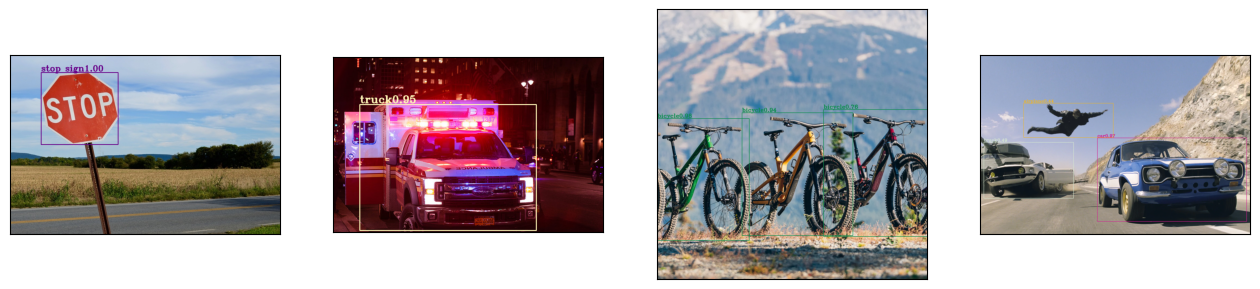

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img3_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(img4_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(img5_rgb)
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(img6_rgb)
plt.xticks([]), plt.yticks([])

plt.show()

• Realice el reconocimiento de objetos de las imágenes 3, 4, 5, y 6 mediante la red neuronal convolucional (CNN) YOLOv8 en su versión sencilla (yolov8n). Cargue el modelo utilizando Ultralytics y el framework PyTorch. Visualice en RGB la imagen, el cuadro delimitador, la categoría, y la puntuación máxima asignadas por la red con ayuda de la base de datos de nombres de clases de Ultralytics.

Redefinir imagenes en RGB

In [ ]:
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

In [ ]:
!pip install Ultralytics
from ultralytics import YOLO

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.3/203.3 kB 22.8 MB/s eta 0:00:00


Cargar modelo sencillo YOLOv8n usando framework Ultralytics


In [ ]:
YOLOv8 = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 94.4MB/s]


Establecer ROI de entrada (blob) en RGB, evaluar ROI en el
modelo YOLOv8, obtener nombres de las etiquetas de clases,
obtener etiquetas de clases y visualizar nombres de clases

In [ ]:
results3 = YOLOv8(img3_rgb)
results4 = YOLOv8(img4_rgb)
results5 = YOLOv8(img5_rgb)
results6 = YOLOv8(img6_rgb)

img3_inferred = results3[0].plot()
img4_inferred = results4[0].plot()
img5_inferred = results5[0].plot()
img6_inferred = results6[0].plot()


0: 448x640 1 stop sign, 194.1ms
Speed: 11.8ms preprocess, 194.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 3 persons, 1 car, 1 motorcycle, 1 truck, 156.9ms
Speed: 4.1ms preprocess, 156.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 bicycles, 382.4ms
Speed: 6.6ms preprocess, 382.4ms inference, 20.1ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 2 cars, 1 airplane, 488.2ms
Speed: 5.1ms preprocess, 488.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


Mostrar imagen

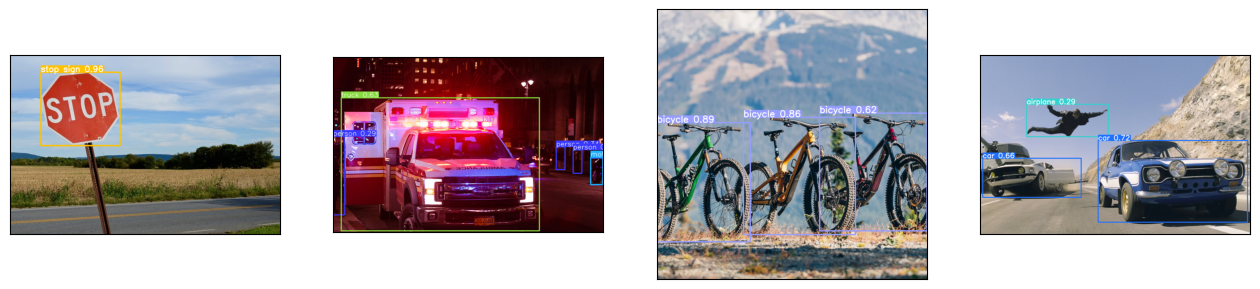

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img3_inferred)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(img4_inferred)
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(img5_inferred)
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(img6_inferred)
plt.xticks([]), plt.yticks([])

plt.show()

• Realice el reconocimiento de objetos de las imágenes 3, 4, 5, y 6 mediante la red neuronal convolucional (CNN) YOLOv8 en su versión robusta (yolov8x). Cargue el modelo utilizando Ultralytics y el framework PyTorch. Visualice en RGB la imagen, el cuadro delimitador, la categoría, y la puntuación máximaa asignadas por la red con ayuda de la base de datos de
nombres de clases de Ultralytics.


Redefinir imagenes en RGB

In [ ]:
img3_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
img4_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)
img5_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)
img6_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

Cargar modelo robusto YOLOv8x usando framework Ultralytics


In [ ]:
YOLOv8 = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 175MB/s]


Establecer ROI de entrada (blob) en RGB, evaluar ROI en el
modelo YOLOv8, obtener nombres de las etiquetas de clases,
obtener etiquetas de clases y visualizar nombres de clases

In [ ]:
results3 = YOLOv8(img3_rgb)
results4 = YOLOv8(img4_rgb)
results5 = YOLOv8(img5_rgb)
results6 = YOLOv8(img6_rgb)

img3_inferred = results3[0].plot()
img4_inferred = results4[0].plot()
img5_inferred = results5[0].plot()
img6_inferred = results6[0].plot()


0: 448x640 1 stop sign, 3399.1ms
Speed: 9.1ms preprocess, 3399.1ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

0: 416x640 5 persons, 3 cars, 1 truck, 2886.8ms
Speed: 3.8ms preprocess, 2886.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 bicycles, 4362.1ms
Speed: 6.2ms preprocess, 4362.1ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

0: 448x640 1 person, 2 cars, 4400.9ms
Speed: 4.7ms preprocess, 4400.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


Mostrar imagen

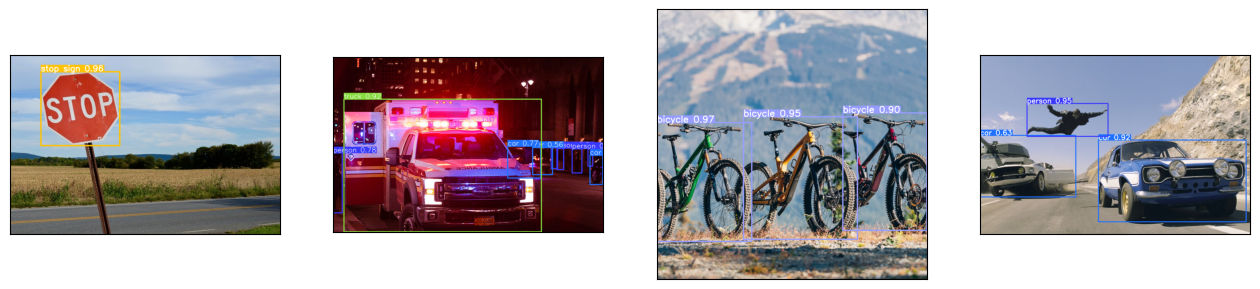

In [ ]:
plt.figure(figsize=(16,4))

plt.subplot(141)
plt.imshow(img3_inferred)
plt.xticks([]), plt.yticks([])

plt.subplot(142)
plt.imshow(img4_inferred)
plt.xticks([]), plt.yticks([])

plt.subplot(143)
plt.imshow(img5_inferred)
plt.xticks([]), plt.yticks([])

plt.subplot(144)
plt.imshow(img6_inferred)
plt.xticks([]), plt.yticks([])

plt.show()

• Realice para las imágenes 3, 4, 5, y 6 la comparación de las puntuaciones máximas asignadas por cada una de las 3 redes de reconocimiento de objetos mencionadas anteriormente.

**Resultados:**

* Puntuación máxima imagen signo de "pare":
  * MobileNet: 1.00 ("stop sign")
  * YOLO simple: 0.96 ("stop sign")
  * YOLO robusta: 0.96 ("stop sign")
* Puntuación máxima imagen ambulancia:
  * MobileNet: 0.96 ("truck")
  * YOLO simple: 0.63 ("truck")
  * YOLO robusta: 0.92 ("truck")
* Puntuación máxima imagen bicicleta:
  * MobileNet: 0.94 ("bicycle")
  * YOLO simple: 0.89 ("bicycle")
  * YOLO robusta: 0.97 ("bicycle")
* Puntuación máxima imagen rápidos y furiosos:
  * MobileNet: 0.87 ("car")
  * YOLO simple: 0.72 ("car")
  * YOLO robusta: 0.95 ("person")

Podemos observar que los tres métodos identifican el signo de pare y las bicicletas bien con un puntaje significativo. Sin embargo, si bien los tres métodos encuentran la ambulancia, todos le asignan la etiqueta de camión que no es del todo exacta. Para la última imagen YOLO simple y MobileNet tienen problemas identificando la persona volando y lo clasifican como avión, y su puntaje máximo corresponde al carro en la derecha que es etiquetado correctamente. Curiosamente, con el método YOLO robusto el objeto que más le había costado identificar correctamente a los demás métodos es el que tiene puntaje máximo de clasificación.

